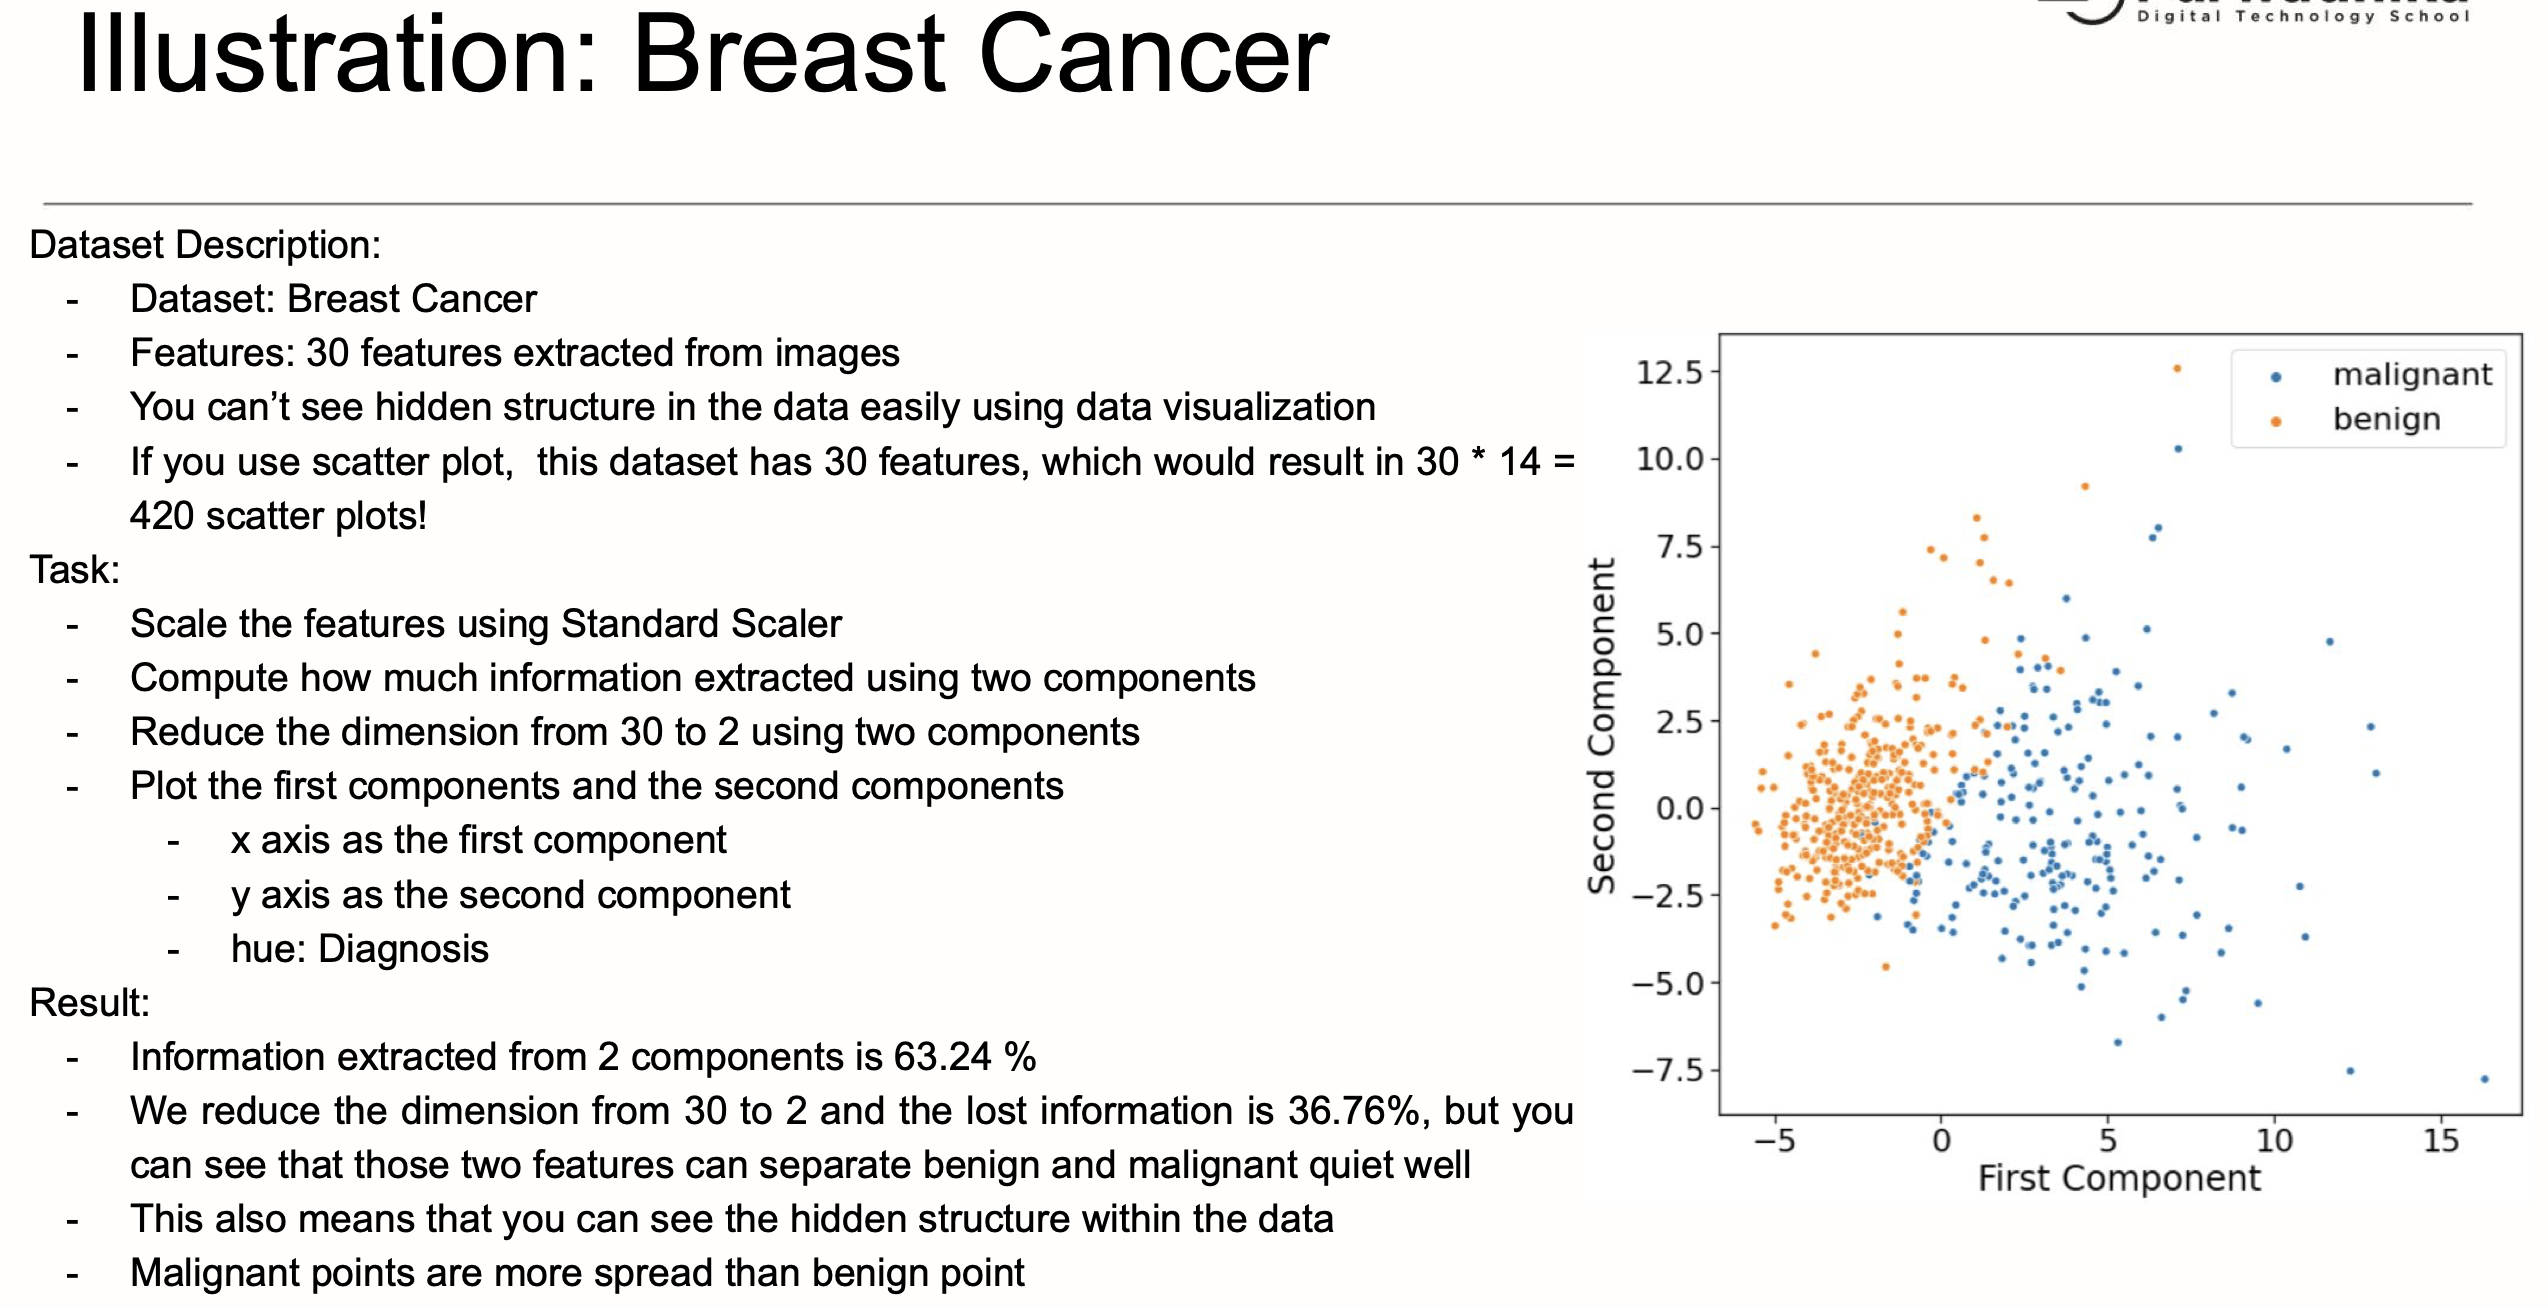

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

## Load Dataset 

In [52]:
andy=load_breast_cancer()

#feature
feature=pd.DataFrame(andy['data'])
feature.columns=andy.feature_names


#label
label=pd.DataFrame(andy['target']).rename(columns={0:'label'})
label['label']=label['label'].replace({1:'Benign',0:'Malignant'})


# scaling with Standard Scaler

In [53]:
#create scaler
scaler=StandardScaler()

#fit scaler
scaler.fit(feature)


StandardScaler()

In [54]:
X_scaled=scaler.fit_transform(feature)
X_scaled=pd.DataFrame(X_scaled)
X_scaled.columns=scaler.get_feature_names_out()
X_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


# PCA

In [55]:
#create PCA
pca=PCA(n_components=30)

#fit pca to X_scaled
pca.fit(X_scaled)

#transform
X_pca=pca.transform(X_scaled)
X_pca=pd.DataFrame(X_pca)
X_pca.columns=pca.get_feature_names_out()
X_pca

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,0.006888,-0.067000,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,-0.009802,0.019563,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,-0.036592,0.063352,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,0.140648,-0.042478,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783


In [56]:
X_pca

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,0.006888,-0.067000,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,-0.009802,0.019563,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,-0.036592,0.063352,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,0.140648,-0.042478,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783


In [57]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14',
       'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21',
       'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28',
       'pca29'], dtype=object)

## Variance

In [58]:
variance=[]
for i in X_pca.columns:
    variance.append(np.var(X_pca[i]))
df_var=pd.DataFrame({'PCA Columns':pca.get_feature_names_out(), 'Variance':variance})
df_var

,PCA Columns,Variance
0,pca0,13.281608
1,pca1,5.691355
2,pca2,2.817949
3,pca3,1.980640
4,pca4,1.648731
5,pca5,1.207357
6,pca6,0.675220
7,pca7,0.476617
8,pca8,0.416895
9,pca9,0.350693


In [59]:
print(f"informasi yang dapat diekstrak dari 30 fitur tersebut dengan 2 fitur PCA adalah {round(100*(df_var['Variance'].iloc[:2].sum())/(df_var['Variance'].sum()),2)} %")

informasi yang dapat diekstrak dari 30 fitur tersebut dengan 2 fitur PCA adalah 63.24 %


## Visualisasi PCA with 2 features

In [60]:
# buat 2 komponen

#create PCA
pca=PCA(n_components=2)

#fit pca to X_scaled
pca.fit(X_scaled)

#transform
X_pca=pca.transform(X_scaled)
X_pca=pd.DataFrame(X_pca)
X_pca.columns=pca.get_feature_names_out()

#combine pca feature & label
df_pca=pd.concat([X_pca,label],axis=1)
df_pca

,pca0,pca1,label
0,9.192837,1.948583,Malignant
1,2.387802,-3.768172,Malignant
2,5.733896,-1.075174,Malignant
3,7.122953,10.275589,Malignant
4,3.935302,-1.948072,Malignant
...,...,...,...
564,6.439315,-3.576817,Malignant
565,3.793382,-3.584048,Malignant
566,1.256179,-1.902297,Malignant
567,10.374794,1.672010,Malignant


<Axes: xlabel='pca0', ylabel='pca1'>

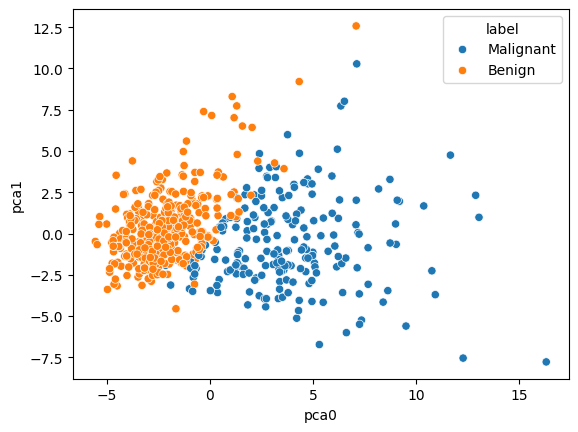

In [62]:
sns.scatterplot(data=df_pca,x='pca0',y='pca1', hue='label')

`Insight` :

1. Informasi yang diekstrak dari 30 kolom menggunakan 2 principal kolom adalah sebesar 63.24 %

1. PCA dapat mereduce dimensinya dari 30 menjadi 2 dengan informasi yang hilang sebesar 36.76 %

# Soal 1 (5 poin)

- Lakukan scaling, drop missing value
- buat PCA menggunakan n=2 untuk data penguins 4 kolom (bill_length, bill_depth, flipper_length, body_mass) + 1 target(species)
- gambarkan scatter plotnya

## Load Dataset Penguins

In [66]:
df=sns.load_dataset('penguins')
df.dropna(inplace=True)
df.reset_index(inplace=True)

#feature
feature=df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]



#label
label=df['species']


# scaling with Standard Scaler

In [67]:
#create scaler
scaler=StandardScaler()

#fit scaler
scaler.fit(feature)


StandardScaler()

In [68]:
X_scaled=scaler.fit_transform(feature)
X_scaled=pd.DataFrame(X_scaled)
X_scaled.columns=scaler.get_feature_names_out()
X_scaled

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852
...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957
329,0.514098,-1.457000,1.002739,0.799674
330,1.173384,-0.744994,1.502928,1.919069
331,0.221082,-1.202712,0.788372,1.234995


# PCA

In [70]:
#create PCA
pca=PCA(n_components=4)

#fit pca to X_scaled
pca.fit(X_scaled)

#transform
X_pca=pca.transform(X_scaled)
X_pca=pd.DataFrame(X_pca)
X_pca.columns=pca.get_feature_names_out()
X_pca

,pca0,pca1,pca2,pca3
0,-1.853593,0.032069,-0.234902,0.528397
1,-1.316254,-0.443527,-0.027470,0.401727
2,-1.376605,-0.161230,0.189689,-0.528662
3,-1.885288,-0.012351,-0.628873,-0.472893
4,-1.919981,0.817598,-0.701051,-0.196416
...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892
329,1.832651,-0.784510,0.240758,-0.008955
330,2.751505,0.266556,-0.419306,0.236256
331,1.713854,-0.725875,-0.262764,0.330004


## Variance

In [73]:
variance=[]
for i in X_pca.columns:
    variance.append(np.var(X_pca[i]))
df_var=pd.DataFrame({'PCA Columns':pca.get_feature_names_out(), 'Variance':variance})
df_var

,PCA Columns,Variance
0,pca0,2.745356
1,pca1,0.778117
2,pca2,0.368643
3,pca3,0.107885


In [74]:
print(f"informasi yang dapat diekstrak dari 4 fitur tersebut dengan 2 fitur PCA adalah {round(100*(df_var['Variance'].iloc[:2].sum())/(df_var['Variance'].sum()),2)} %")

informasi yang dapat diekstrak dari 4 fitur tersebut dengan 2 fitur PCA adalah 88.09 %


## Visualisasi PCA with 2 features

In [75]:
# buat 2 komponen

#create PCA
pca=PCA(n_components=2)

#fit pca to X_scaled
pca.fit(X_scaled)

#transform
X_pca=pca.transform(X_scaled)
X_pca=pd.DataFrame(X_pca)
X_pca.columns=pca.get_feature_names_out()

#combine pca feature & label
df_pca=pd.concat([X_pca,label],axis=1)
df_pca

,pca0,pca1,species
0,-1.853593,0.032069,Adelie
1,-1.316254,-0.443527,Adelie
2,-1.376605,-0.161230,Adelie
3,-1.885288,-0.012351,Adelie
4,-1.919981,0.817598,Adelie
...,...,...,...
328,1.997716,-0.976771,Gentoo
329,1.832651,-0.784510,Gentoo
330,2.751505,0.266556,Gentoo
331,1.713854,-0.725875,Gentoo


<Axes: xlabel='pca0', ylabel='pca1'>

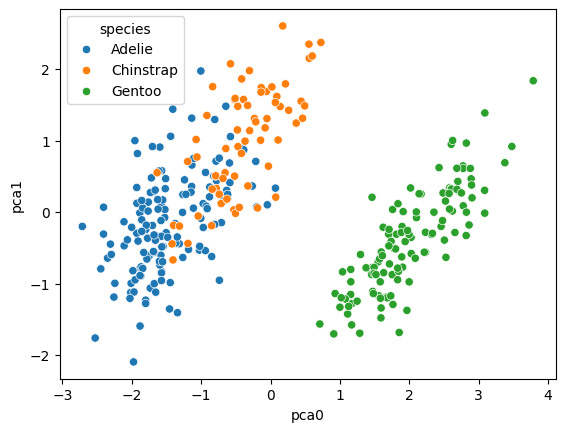

In [76]:
sns.scatterplot(data=df_pca,x='pca0',y='pca1', hue='species')

`Insight` :

1. Informasi yang diekstrak dari 4 kolom menggunakan 2 principal kolom adalah sebesar 88.09 %

1. PCA dapat mereduce dimensinya dari 4 menjadi 2 dengan informasi yang hilang sebesar 11.91 %